In [15]:
#General-purpose libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

## Sklearn models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TensorFlow and Keras for deep learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout

import warnings
warnings.filterwarnings("ignore")

# Data Representation 

In [16]:
# Read the dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\Hyderabad .csv")
df

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Hyderabad,Amberpet,01-Feb-23,0.0,21.5,29.7,42.2,78.6,0.0,2.0
1,Hyderabad,Amberpet,02-Feb-23,0.0,19.9,30.4,37.0,73.6,0.0,1.9
2,Hyderabad,Amberpet,03-Feb-23,0.0,18.5,30.1,27.8,55.1,0.0,2.0
3,Hyderabad,Amberpet,04-Feb-23,0.0,19.1,31.4,15.6,60.3,0.0,2.1
4,Hyderabad,Amberpet,05-Feb-23,0.0,20.1,31.9,24.2,58.1,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...
11691,Hyderabad,Tirumalgiri,27-Jan-25,0.0,17.7,33.0,38.0,89.6,0.0,4.4
11692,Hyderabad,Tirumalgiri,28-Jan-25,0.0,18.0,33.2,35.7,90.1,0.0,3.5
11693,Hyderabad,Tirumalgiri,29-Jan-25,0.0,18.5,32.8,43.7,91.4,0.0,0.3
11694,Hyderabad,Tirumalgiri,30-Jan-25,0.0,17.8,32.0,51.0,100.0,0.0,0.7


#### Representing unique values 

In [17]:
df.nunique()

District                   1
Mandal                    16
Date                     731
Rain (mm)                529
Min Temp (°C)            200
Max Temp (°C)            211
Min Humidity (%)         850
Max Humidity (%)         601
Min Wind Speed (Kmph)    101
Max Wind Speed (Kmph)    430
dtype: int64

#### Describing the information on dataset 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   District               11696 non-null  object 
 1   Mandal                 11696 non-null  object 
 2   Date                   11696 non-null  object 
 3   Rain (mm)              11696 non-null  float64
 4   Min Temp (°C)          11696 non-null  float64
 5   Max Temp (°C)          11696 non-null  float64
 6   Min Humidity (%)       11696 non-null  float64
 7   Max Humidity (%)       11696 non-null  float64
 8   Min Wind Speed (Kmph)  11696 non-null  float64
 9   Max Wind Speed (Kmph)  11696 non-null  float64
dtypes: float64(7), object(3)
memory usage: 913.9+ KB


#### Column Names

In [19]:
df.columns

Index(['District', 'Mandal', 'Date', 'Rain (mm)', 'Min Temp (°C)',
       'Max Temp (°C)', 'Min Humidity (%)', 'Max Humidity (%)',
       'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)'],
      dtype='object')

#### Represent the top 5 rows in the dataset 

In [20]:
df.head()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Hyderabad,Amberpet,01-Feb-23,0.0,21.5,29.7,42.2,78.6,0.0,2.0
1,Hyderabad,Amberpet,02-Feb-23,0.0,19.9,30.4,37.0,73.6,0.0,1.9
2,Hyderabad,Amberpet,03-Feb-23,0.0,18.5,30.1,27.8,55.1,0.0,2.0
3,Hyderabad,Amberpet,04-Feb-23,0.0,19.1,31.4,15.6,60.3,0.0,2.1
4,Hyderabad,Amberpet,05-Feb-23,0.0,20.1,31.9,24.2,58.1,0.0,2.1


#### Represent the last 5 rows in the dataset 

In [21]:
df.tail()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
11691,Hyderabad,Tirumalgiri,27-Jan-25,0.0,17.7,33.0,38.0,89.6,0.0,4.4
11692,Hyderabad,Tirumalgiri,28-Jan-25,0.0,18.0,33.2,35.7,90.1,0.0,3.5
11693,Hyderabad,Tirumalgiri,29-Jan-25,0.0,18.5,32.8,43.7,91.4,0.0,0.3
11694,Hyderabad,Tirumalgiri,30-Jan-25,0.0,17.8,32.0,51.0,100.0,0.0,0.7
11695,Hyderabad,Tirumalgiri,31-Jan-25,0.0,18.0,33.1,51.6,95.9,0.0,3.2


# Data Wrangling

### Check Duplicated Values 

In [22]:
df.duplicated().sum()

np.int64(0)

### check Missing Values 

In [23]:
df.isnull().sum()

District                 0
Mandal                   0
Date                     0
Rain (mm)                0
Min Temp (°C)            0
Max Temp (°C)            0
Min Humidity (%)         0
Max Humidity (%)         0
Min Wind Speed (Kmph)    0
Max Wind Speed (Kmph)    0
dtype: int64

In [24]:
df.head(4)

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Hyderabad,Amberpet,01-Feb-23,0.0,21.5,29.7,42.2,78.6,0.0,2.0
1,Hyderabad,Amberpet,02-Feb-23,0.0,19.9,30.4,37.0,73.6,0.0,1.9
2,Hyderabad,Amberpet,03-Feb-23,0.0,18.5,30.1,27.8,55.1,0.0,2.0
3,Hyderabad,Amberpet,04-Feb-23,0.0,19.1,31.4,15.6,60.3,0.0,2.1


In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.drop("District",axis=1,inplace=True)

In [27]:
df

,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Amberpet,01-Feb-23,0.0,21.5,29.7,42.2,78.6,0.0,2.0
1,Amberpet,02-Feb-23,0.0,19.9,30.4,37.0,73.6,0.0,1.9
2,Amberpet,03-Feb-23,0.0,18.5,30.1,27.8,55.1,0.0,2.0
3,Amberpet,04-Feb-23,0.0,19.1,31.4,15.6,60.3,0.0,2.1
4,Amberpet,05-Feb-23,0.0,20.1,31.9,24.2,58.1,0.0,2.1
...,...,...,...,...,...,...,...,...,...
11691,Tirumalgiri,27-Jan-25,0.0,17.7,33.0,38.0,89.6,0.0,4.4
11692,Tirumalgiri,28-Jan-25,0.0,18.0,33.2,35.7,90.1,0.0,3.5
11693,Tirumalgiri,29-Jan-25,0.0,18.5,32.8,43.7,91.4,0.0,0.3
11694,Tirumalgiri,30-Jan-25,0.0,17.8,32.0,51.0,100.0,0.0,0.7


In [28]:
df.columns

Index(['Mandal', 'Date', 'Rain (mm)', 'Min Temp (°C)', 'Max Temp (°C)',
       'Min Humidity (%)', 'Max Humidity (%)', 'Min Wind Speed (Kmph)',
       'Max Wind Speed (Kmph)'],
      dtype='object')

In [29]:
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
df = df.dropna(subset=['Date'])
df

,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Amberpet,2023-02-01,0.0,21.5,29.7,42.2,78.6,0.0,2.0
1,Amberpet,2023-02-02,0.0,19.9,30.4,37.0,73.6,0.0,1.9
2,Amberpet,2023-02-03,0.0,18.5,30.1,27.8,55.1,0.0,2.0
3,Amberpet,2023-02-04,0.0,19.1,31.4,15.6,60.3,0.0,2.1
4,Amberpet,2023-02-05,0.0,20.1,31.9,24.2,58.1,0.0,2.1
...,...,...,...,...,...,...,...,...,...
11691,Tirumalgiri,2025-01-27,0.0,17.7,33.0,38.0,89.6,0.0,4.4
11692,Tirumalgiri,2025-01-28,0.0,18.0,33.2,35.7,90.1,0.0,3.5
11693,Tirumalgiri,2025-01-29,0.0,18.5,32.8,43.7,91.4,0.0,0.3
11694,Tirumalgiri,2025-01-30,0.0,17.8,32.0,51.0,100.0,0.0,0.7


## Statistical Summary

In [30]:
desc_stats=df.describe()
desc_stats

,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
count,11696,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000
mean,2024-02-01 00:00:00.000000256,2.785414,22.568759,33.987945,41.734978,83.526727,0.687970,11.783738
min,2023-02-01 00:00:00,0.000000,9.700000,22.700000,5.300000,0.000000,0.000000,0.000000
25%,2023-08-02 00:00:00,0.000000,20.600000,31.900000,28.300000,74.500000,0.000000,7.200000
50%,2024-02-01 00:00:00,0.000000,23.000000,33.500000,41.000000,86.600000,0.000000,10.200000
75%,2024-08-02 00:00:00,0.000000,24.500000,36.100000,53.400000,95.200000,0.700000,14.000000
max,2025-01-31 00:00:00,98.000000,31.700000,44.000000,98.100000,100.000000,15.500000,69.500000
std,NaN,9.474985,3.253496,3.660068,17.458855,14.086112,1.420903,9.487874


# Check Outliers Values

### Boxplots before Cleaning

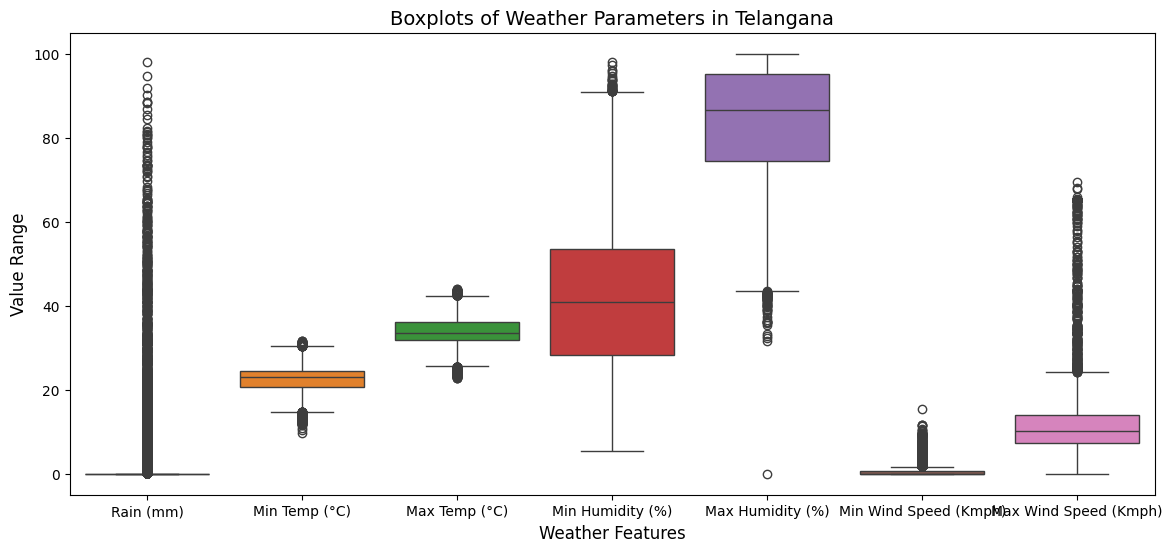

In [31]:
# Create figure and set size
plt.figure(figsize=(14, 6))

# Create boxplot
sns.boxplot(data=df[['Rain (mm)', 'Min Temp (°C)', 'Max Temp (°C)',
           'Min Humidity (%)', 'Max Humidity (%)',
           'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)']])

# Add title and axis labels
plt.title("Boxplots of Weather Parameters in Telangana", fontsize=14)
plt.xlabel("Weather Features", fontsize=12)
plt.ylabel("Value Range", fontsize=12)

# Show plot
plt.show()

### Treating Outliers

In [32]:
# Convert 'Date' column to datetime for consistency
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Columns to check for outliers
columns = ['Rain (mm)', 'Min Temp (°C)', 'Max Temp (°C)',
           'Min Humidity (%)', 'Max Humidity (%)',
           'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function
df_cleaned = remove_outliers_iqr(df, columns)

# Check new shape
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Original shape: (11696, 9)
After removing outliers: (6757, 9)


### Boxplots Again After Cleaning 

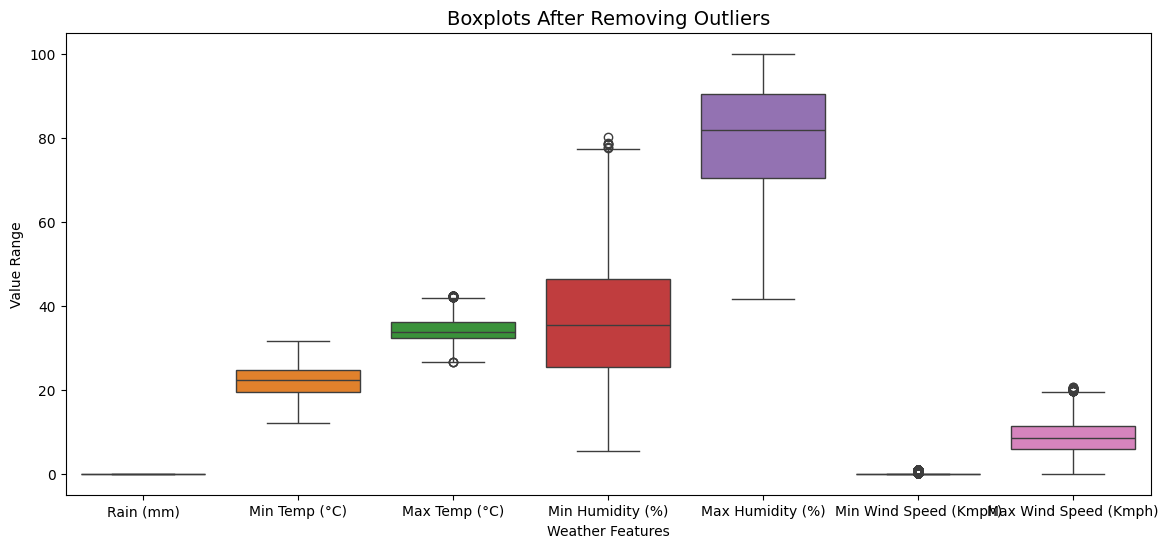

In [33]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[columns])
plt.title("Boxplots After Removing Outliers", fontsize=14)
plt.xlabel("Weather Features")
plt.ylabel("Value Range")
plt.show()

#### Create Rain_binary column

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Rain_binary'] = (df['Rain (mm)'] > 0).astype(int)  # Create Rain_binary

In [35]:
df.head()

,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Rain_binary
0,Amberpet,2023-02-01,0.0,21.5,29.7,42.2,78.6,0.0,2.0,0
1,Amberpet,2023-02-02,0.0,19.9,30.4,37.0,73.6,0.0,1.9,0
2,Amberpet,2023-02-03,0.0,18.5,30.1,27.8,55.1,0.0,2.0,0
3,Amberpet,2023-02-04,0.0,19.1,31.4,15.6,60.3,0.0,2.1,0
4,Amberpet,2023-02-05,0.0,20.1,31.9,24.2,58.1,0.0,2.1,0


In [36]:
df.nunique()

Mandal                    16
Date                     731
Rain (mm)                529
Min Temp (°C)            200
Max Temp (°C)            211
Min Humidity (%)         850
Max Humidity (%)         601
Min Wind Speed (Kmph)    101
Max Wind Speed (Kmph)    430
Rain_binary                2
dtype: int64

# Exploratory Data Analysis 

#### The goal of EDA is to better understand the distributions of features, identify trends or patterns, and explore relationships between features and the target variable.
#### Univaraite Analysis

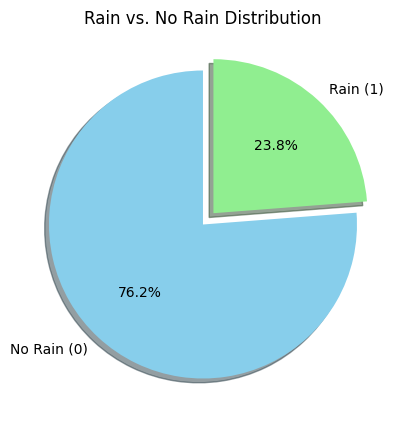

In [37]:
plt.figure(figsize=(5, 5))
df['Rain_binary'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No Rain (0)', 'Rain (1)'],
    colors=['skyblue', 'lightgreen'],
    startangle=90,
    explode=[0, 0.1],
    shadow=True
)
plt.title('Rain vs. No Rain Distribution')
plt.ylabel('')  # Hides the y-axis label
plt.show()


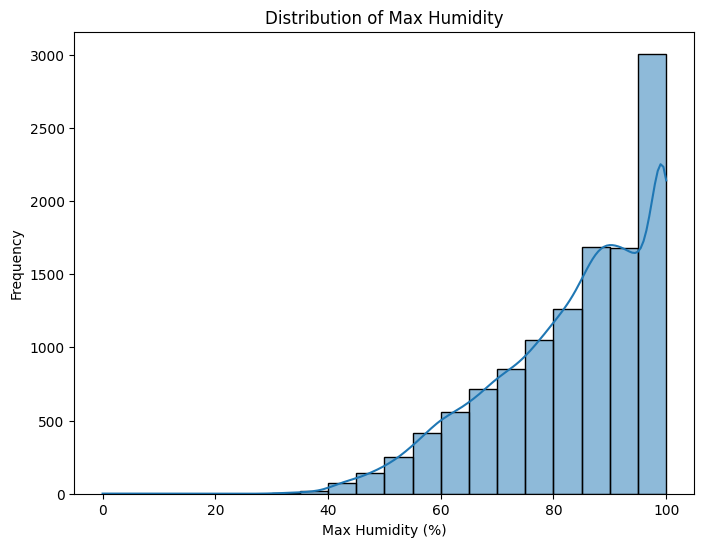

In [38]:
# A Distribution of Max Humidity
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Max Humidity (%)', bins=20, kde=True)
plt.title('Distribution of Max Humidity')
plt.xlabel('Max Humidity (%)')
plt.ylabel('Frequency')
plt.savefig('univariate_max_humidity.png')
plt.show()

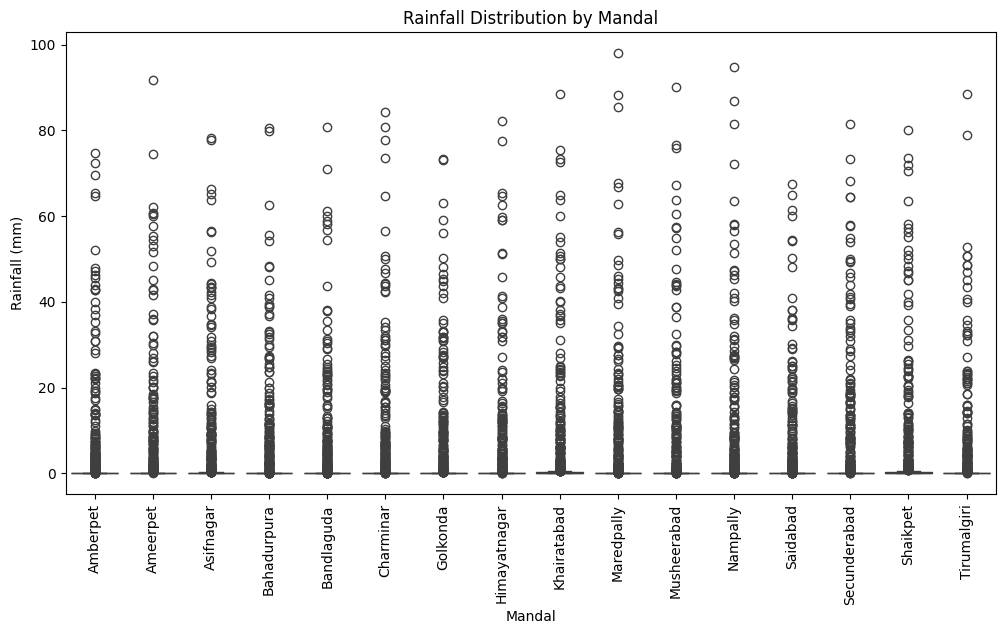

In [39]:
#Box Plot of Rainfall by District
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mandal', y='Rain (mm)', data=df)
plt.title('Rainfall Distribution by Mandal')
plt.xlabel('Mandal')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

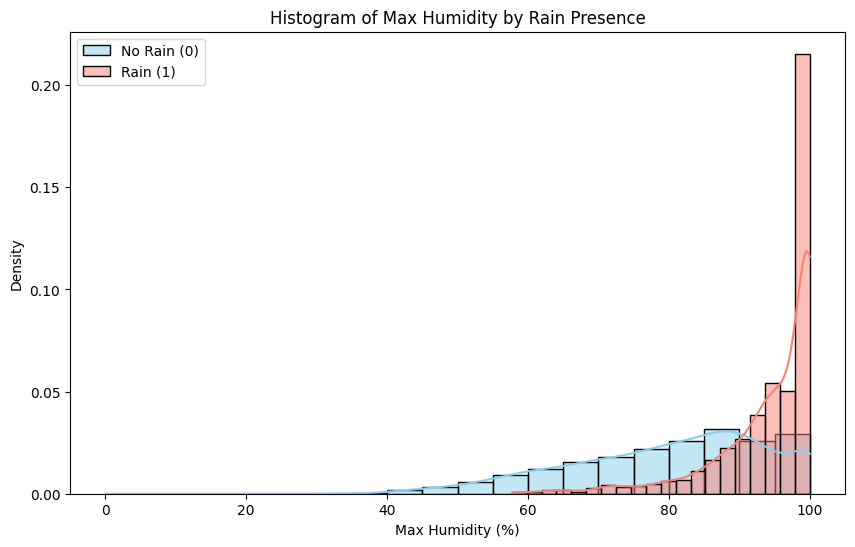

In [40]:
plt.figure(figsize=(10, 6))

# Histogram for No Rain (Rain_binary = 0)
sns.histplot(df[df['Rain_binary'] == 0]['Max Humidity (%)'], 
             color='skyblue', label='No Rain (0)', kde=True, stat='density', bins=20)

# Histogram for Rain (Rain_binary = 1)
sns.histplot(df[df['Rain_binary'] == 1]['Max Humidity (%)'], 
             color='salmon', label='Rain (1)', kde=True, stat='density', bins=20)

plt.title('Histogram of Max Humidity by Rain Presence')
plt.xlabel('Max Humidity (%)')
plt.ylabel('Density')
plt.legend()
plt.savefig('histogram_humidity_vs_rain.png')
plt.show()


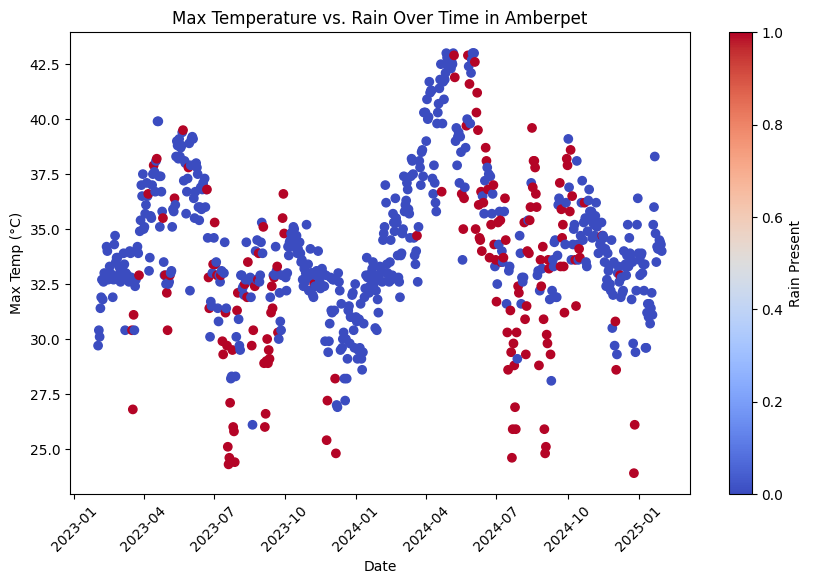

In [41]:
# Rain (mm) vs. Max Temp over Time (sample Mandal)
amberpet_df = df[df['Mandal'] == 'Amberpet']
plt.figure(figsize=(10, 6))
plt.scatter(amberpet_df['Date'], amberpet_df['Max Temp (°C)'], c=amberpet_df['Rain_binary'], cmap='coolwarm')
plt.title('Max Temperature vs. Rain Over Time in Amberpet')
plt.xlabel('Date')
plt.ylabel('Max Temp (°C)')
plt.colorbar(label='Rain Present')
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

In [42]:
import plotly.express as px

fig = px.scatter(df_cleaned, x='Max Temp (°C)', y='Rain (mm)', 
                 size='Max Humidity (%)', color='Min Temp (°C)',
                 title=' Max Temp vs Rainfall with Humidity')
fig.show()


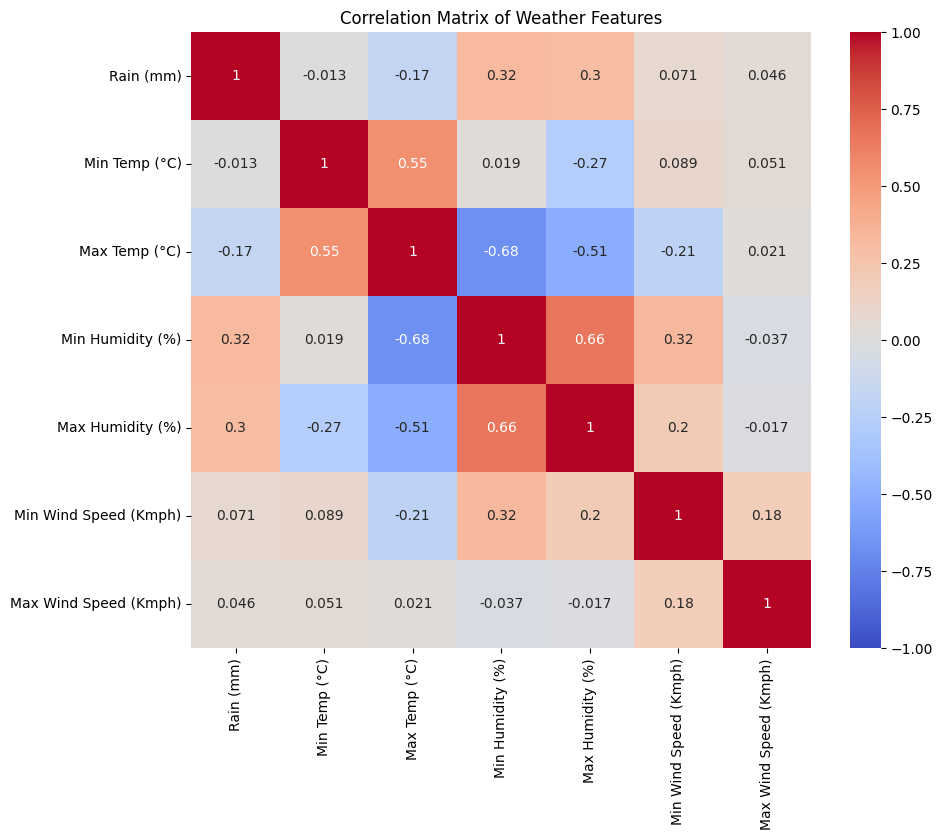

In [43]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int32']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Features')
plt.show()

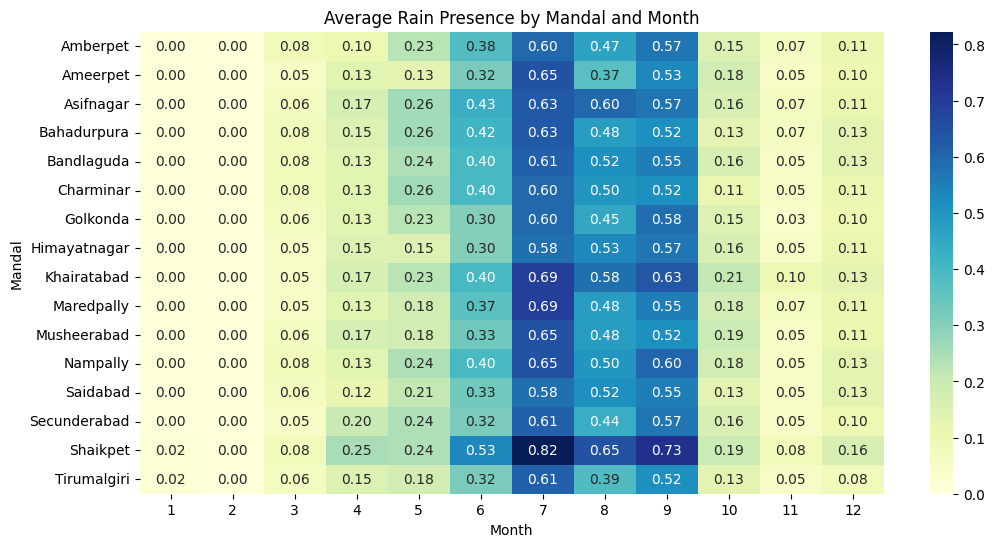

In [44]:
# Rain by Mandal and Month
df['Month'] = df['Date'].dt.month
pivot_table = df.pivot_table(values='Rain_binary', index='Mandal', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Rain Presence by Mandal and Month')
plt.xlabel('Month')
plt.ylabel('Mandal')
plt.show()

# Data Preprocessing 

In [45]:
# Feature engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Temp_Range'] = df['Max Temp (°C)'] - df['Min Temp (°C)']
df['Humidity_Range'] = df['Max Humidity (%)'] - df['Min Humidity (%)']
df['Wind_Speed_Range'] = df['Max Wind Speed (Kmph)'] - df['Min Wind Speed (Kmph)']
df  

,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Rain_binary,Month,Year,Day,Temp_Range,Humidity_Range,Wind_Speed_Range
0,Amberpet,2023-02-01,0.0,21.5,29.7,42.2,78.6,0.0,2.0,0,2,2023,1,8.2,36.4,2.0
1,Amberpet,2023-02-02,0.0,19.9,30.4,37.0,73.6,0.0,1.9,0,2,2023,2,10.5,36.6,1.9
2,Amberpet,2023-02-03,0.0,18.5,30.1,27.8,55.1,0.0,2.0,0,2,2023,3,11.6,27.3,2.0
3,Amberpet,2023-02-04,0.0,19.1,31.4,15.6,60.3,0.0,2.1,0,2,2023,4,12.3,44.7,2.1
4,Amberpet,2023-02-05,0.0,20.1,31.9,24.2,58.1,0.0,2.1,0,2,2023,5,11.8,33.9,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691,Tirumalgiri,2025-01-27,0.0,17.7,33.0,38.0,89.6,0.0,4.4,0,1,2025,27,15.3,51.6,4.4
11692,Tirumalgiri,2025-01-28,0.0,18.0,33.2,35.7,90.1,0.0,3.5,0,1,2025,28,15.2,54.4,3.5
11693,Tirumalgiri,2025-01-29,0.0,18.5,32.8,43.7,91.4,0.0,0.3,0,1,2025,29,14.3,47.7,0.3
11694,Tirumalgiri,2025-01-30,0.0,17.8,32.0,51.0,100.0,0.0,0.7,0,1,2025,30,14.2,49.0,0.7


## Data Encoding

##### To apply encoding to categorical columns in dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)

In [46]:
# Encode categorical variable
le = LabelEncoder()
df['Mandal_Encoded'] = le.fit_transform(df['Mandal'])
df

,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Rain_binary,Month,Year,Day,Temp_Range,Humidity_Range,Wind_Speed_Range,Mandal_Encoded
0,Amberpet,2023-02-01,0.0,21.5,29.7,42.2,78.6,0.0,2.0,0,2,2023,1,8.2,36.4,2.0,0
1,Amberpet,2023-02-02,0.0,19.9,30.4,37.0,73.6,0.0,1.9,0,2,2023,2,10.5,36.6,1.9,0
2,Amberpet,2023-02-03,0.0,18.5,30.1,27.8,55.1,0.0,2.0,0,2,2023,3,11.6,27.3,2.0,0
3,Amberpet,2023-02-04,0.0,19.1,31.4,15.6,60.3,0.0,2.1,0,2,2023,4,12.3,44.7,2.1,0
4,Amberpet,2023-02-05,0.0,20.1,31.9,24.2,58.1,0.0,2.1,0,2,2023,5,11.8,33.9,2.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691,Tirumalgiri,2025-01-27,0.0,17.7,33.0,38.0,89.6,0.0,4.4,0,1,2025,27,15.3,51.6,4.4,15
11692,Tirumalgiri,2025-01-28,0.0,18.0,33.2,35.7,90.1,0.0,3.5,0,1,2025,28,15.2,54.4,3.5,15
11693,Tirumalgiri,2025-01-29,0.0,18.5,32.8,43.7,91.4,0.0,0.3,0,1,2025,29,14.3,47.7,0.3,15
11694,Tirumalgiri,2025-01-30,0.0,17.8,32.0,51.0,100.0,0.0,0.7,0,1,2025,30,14.2,49.0,0.7,15


In [47]:
df.columns

Index(['Mandal', 'Date', 'Rain (mm)', 'Min Temp (°C)', 'Max Temp (°C)',
       'Min Humidity (%)', 'Max Humidity (%)', 'Min Wind Speed (Kmph)',
       'Max Wind Speed (Kmph)', 'Rain_binary', 'Month', 'Year', 'Day',
       'Temp_Range', 'Humidity_Range', 'Wind_Speed_Range', 'Mandal_Encoded'],
      dtype='object')

# Descrprtive analysis 

In [48]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Date,11696,2024-02-01 00:00:00.000000256,2023-02-01 00:00:00,2023-08-02 00:00:00,2024-02-01 00:00:00,2024-08-02 00:00:00,2025-01-31 00:00:00,NaN
Rain (mm),11696.0,2.785414,0.0,0.0,0.0,0.0,98.0,9.474985
Min Temp (°C),11696.0,22.568759,9.7,20.6,23.0,24.5,31.7,3.253496
Max Temp (°C),11696.0,33.987945,22.7,31.9,33.5,36.1,44.0,3.660068
Min Humidity (%),11696.0,41.734978,5.3,28.3,41.0,53.4,98.1,17.458855
Max Humidity (%),11696.0,83.526727,0.0,74.5,86.6,95.2,100.0,14.086112
Min Wind Speed (Kmph),11696.0,0.68797,0.0,0.0,0.0,0.7,15.5,1.420903
Max Wind Speed (Kmph),11696.0,11.783738,0.0,7.2,10.2,14.0,69.5,9.487874
Rain_binary,11696.0,0.237774,0.0,0.0,0.0,0.0,1.0,0.425738
Month,11696.0,6.519836,1.0,4.0,7.0,10.0,12.0,3.449698


In [49]:
# lets groupby month and average humidity(min,max) , temperature(min,max),windspeed(min,max),rain
df_grp_month=df.groupby(["Month"]).agg({"Rain (mm)": "mean",
    "Min Temp (°C)": "mean",
    "Max Temp (°C)": "mean",
    "Min Humidity (%)": "mean",
    "Max Humidity (%)": "mean"}).reset_index()

In [50]:
df_grp_month

,Month,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%)
0,1,0.001210,17.954032,31.955746,36.597480,87.888710
1,2,0.000000,19.967105,33.899452,25.306798,74.488816
2,3,0.727218,22.698387,35.375706,25.944052,74.217238
3,4,1.602917,25.563854,38.395729,25.111562,67.398125
4,5,3.451109,26.162097,38.661492,32.102218,76.040827
5,6,3.514792,25.821667,36.703229,41.353750,80.213333
6,7,8.005746,23.591028,30.766230,64.082359,93.488004
7,8,4.399194,23.982964,32.896069,55.883065,90.737500
8,9,10.160417,23.303333,31.817396,60.157708,94.350625
9,10,0.831855,22.574899,34.183367,43.746169,88.297883


# Machine Learning Models

### Define Features X and Target Y

In [51]:
 # Features and targets 
# Features and targets
features = ['Year', 'Month', 'Day', 'Mandal_Encoded', 'Min Temp (°C)', 'Max Temp (°C)', 
            'Min Humidity (%)', 'Max Humidity (%)', 'Min Wind Speed (Kmph)', 
            'Max Wind Speed (Kmph)', 'Temp_Range', 'Humidity_Range', 'Wind_Speed_Range']
X = df[features]
y_rain = df['Rain_binary']

In [52]:
 # Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_rain, test_size=0.2, random_state=42, stratify=y_rain)
    

In [53]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # X_train should be your 13-feature training data

StandardScaler()

In [54]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

### Logistic Regression 

logistic Regression:
Accuracy: 0.7979
Precision: 0.5472
Recall: 0.8651
F1-Score: 0.6704
AUC-ROC: 0.8958

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1784
           1       0.55      0.87      0.67       556

    accuracy                           0.80      2340
   macro avg       0.75      0.82      0.76      2340
weighted avg       0.85      0.80      0.81      2340



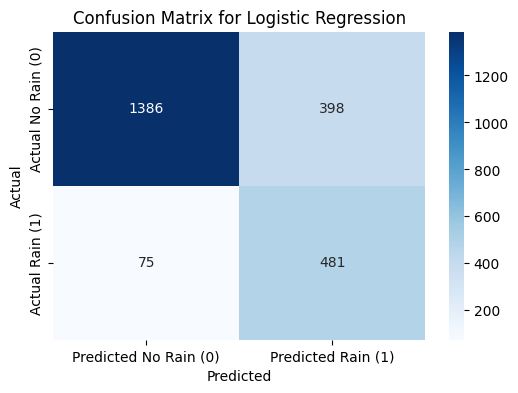

Confusion Matrix for Logistic Regression :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1386                 398
Actual Rain (1)                        75                 481


In [66]:
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(random_state=42, class_weight=class_weight_dict)
lr.fit(X_train, y_train)

# Predict classes and probabilities
y_pred = lr.predict(X_test)  # Final class predictions (0 or 1)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for Logistic Regression :")
print(cm_df.to_string())


# K-Nearest Neighbors (KNN)

KNeighborsClassifier:
Accuracy: 0.8564
Precision: 0.7115
Recall: 0.6655
F1-Score: 0.6877
AUC-ROC: 0.8924

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1784
           1       0.71      0.67      0.69       556

    accuracy                           0.86      2340
   macro avg       0.80      0.79      0.80      2340
weighted avg       0.85      0.86      0.85      2340



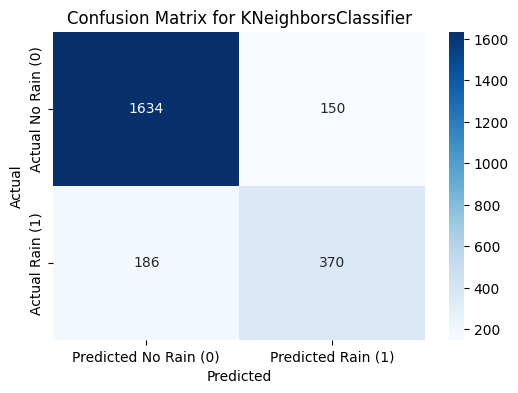

Confusion Matrix for KNeighborsClassifier:
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1634                 150
Actual Rain (1)                       186                 370


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#  KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

#  Predict classes and probabilities
y_pred = model.predict(X_test)  # Final class predictions (0 or 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("KNeighborsClassifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for KNeighborsClassifier:")
print(cm_df.to_string())

#  DecisionTreeClassifier

DecisionTreeClassifier:
Accuracy: 0.8603
Precision: 0.6984
Recall: 0.7248
F1-Score: 0.7114
AUC-ROC: 0.8136

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1784
           1       0.70      0.72      0.71       556

    accuracy                           0.86      2340
   macro avg       0.81      0.81      0.81      2340
weighted avg       0.86      0.86      0.86      2340



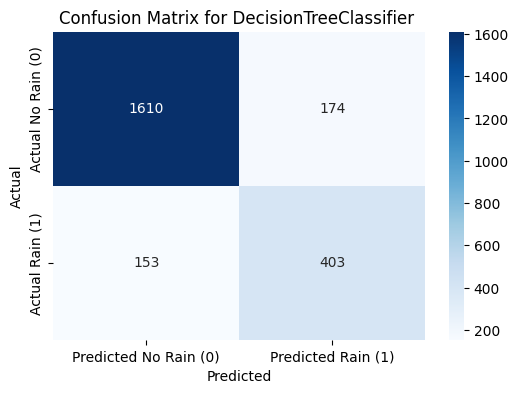

Confusion Matrix for DecisionTreeClassifier :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1610                 174
Actual Rain (1)                       153                 403


In [62]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#  Predict classes and probabilities
y_pred = dt_model.predict(X_test)  # Final class predictions (0 or 1)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("DecisionTreeClassifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Classification Report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DecisionTreeClassifier ')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for DecisionTreeClassifier :")
print(cm_df.to_string())

## Random Forest 

Random Forest Classifier:
Accuracy: 0.9030
Precision: 0.8538
Recall: 0.7140
F1-Score: 0.7777
AUC-ROC: 0.9555

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1784
           1       0.85      0.71      0.78       556

    accuracy                           0.90      2340
   macro avg       0.88      0.84      0.86      2340
weighted avg       0.90      0.90      0.90      2340



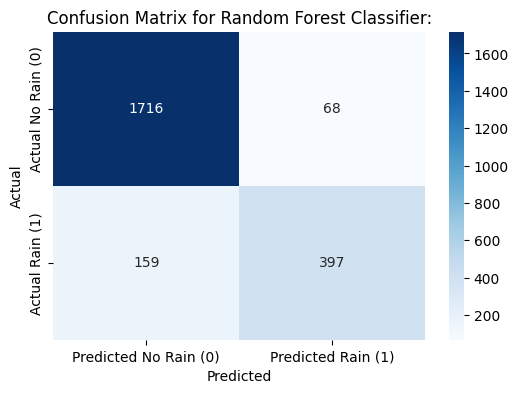

Confusion Matrix for Random Forest Classifier :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1716                  68
Actual Rain (1)                       159                 397


In [61]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100,class_weight=class_weight_dict)
rf_model.fit(X_train, y_train)

#  Predict classes and probabilities
y_pred = rf_model.predict(X_test)  # Final class predictions (0 or 1)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

#  Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


#  Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier:')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for Random Forest Classifier :")
print(cm_df.to_string())

## XGBoost Classifier

XGBoost Classifier:
Accuracy: 0.9171
Precision: 0.8467
Recall: 0.7950
F1-Score: 0.8200
AUC-ROC: 0.9675

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1784
           1       0.85      0.79      0.82       556

    accuracy                           0.92      2340
   macro avg       0.89      0.88      0.88      2340
weighted avg       0.92      0.92      0.92      2340



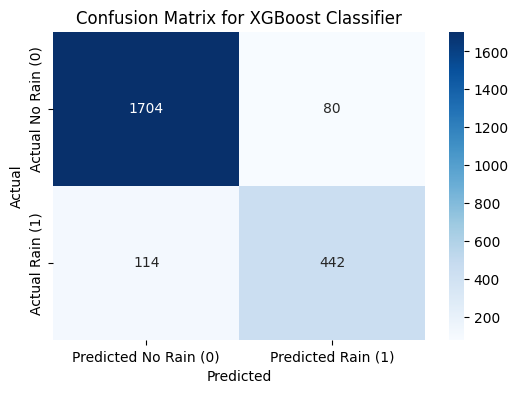

Confusion Matrix for XGBoost Classifier :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1704                  80
Actual Rain (1)                       114                 442


In [67]:
# Initialize and train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',class_weight=class_weight_dict)
xgb_model.fit(X_train, y_train)

# Predict classes and probabilities
y_pred = xgb_model.predict(X_test)  # Final class predictions (0 or 1)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("XGBoost Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for XGBoost Classifier :")
print(cm_df.to_string()) 

## Deep Learning 

#### lstm 

In [68]:
df = pd.get_dummies(df, columns=['Mandal'], drop_first=True)

In [69]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step   
LSTM Classifier:
Accuracy: 0.8585
Precision: 0.6467
Recall: 0.8921
F1 Score: 0.7498
AUC-ROC: 0.9675
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1784
           1       0.65      0.89      0.75       556

    accuracy                           0.86      2340
   macro avg       0.80      0.87      0.83      2340
weighted avg       0.89      0.86      0.87      2340



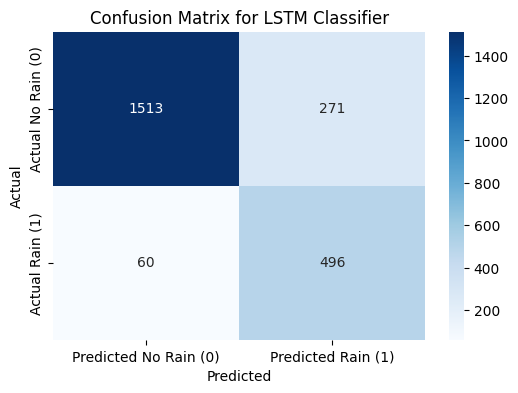

Confusion Matrix for LSTM Classifier :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1513                 271
Actual Rain (1)                        60                 496


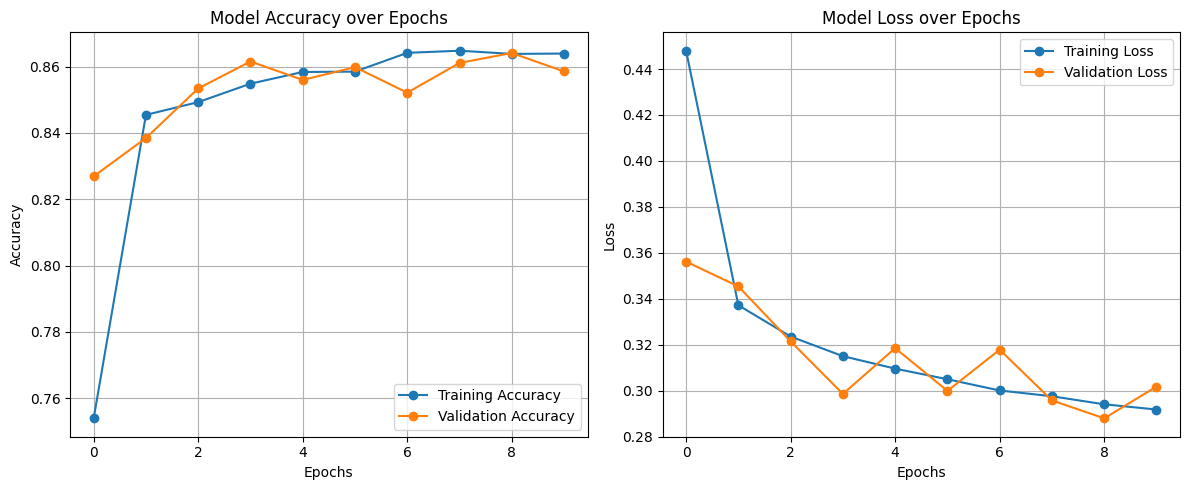

In [70]:
# Reshape data for LSTM [samples, time steps, features]
# Here, we use 1 time step per sample since we don't have a natural time sequence
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),
    verbose=0,
    class_weight=class_weight_dict
)


# Make predictions
y_pred_prob = model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("LSTM Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for LSTM Classifier :")
print(cm_df.to_string())

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# RNN

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step   
RNN Classifier:
Accuracy: 0.8423
Precision: 0.6164
Recall: 0.8903
F1 Score: 0.7285
AUC-ROC: 0.9675
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1784
           1       0.62      0.89      0.73       556

    accuracy                           0.84      2340
   macro avg       0.79      0.86      0.81      2340
weighted avg       0.88      0.84      0.85      2340



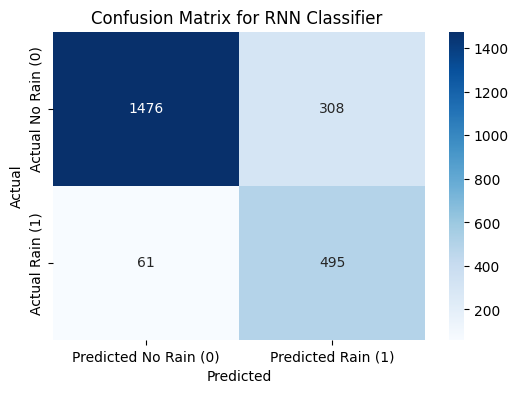

Confusion Matrix for RNN Classifier :
                    Predicted No Rain (0)  Predicted Rain (1)
Actual No Rain (0)                   1476                 308
Actual Rain (1)                        61                 495


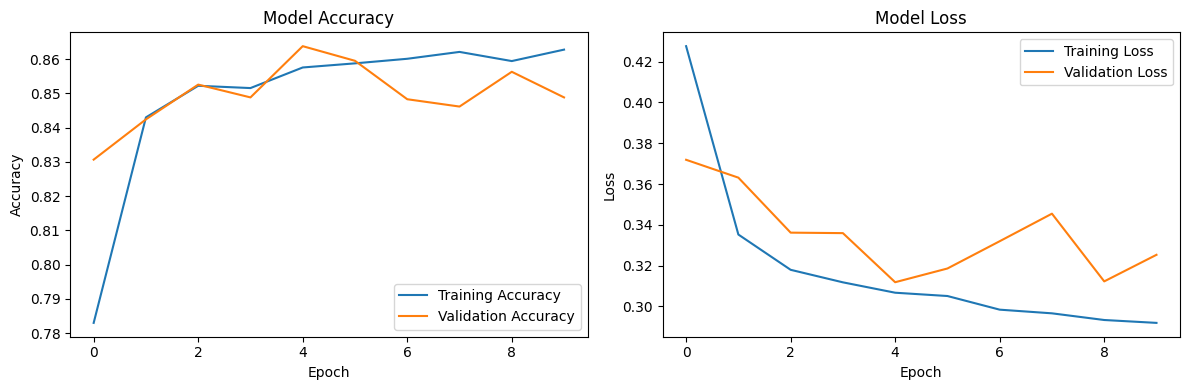

In [71]:
# Reshape data for RNN [samples, time steps, features]
# Use 1 time step per sample since the dataset doesn't have a natural time sequence
X_train_rnn = X_train_scaled.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[1]), activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0,class_weight=class_weight_dict)

# Make predictions
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("RNN Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No Rain (0)', 'Actual Rain (1)'], columns=['Predicted No Rain (0)', 'Predicted Rain (1)'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RNN Classifier ')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print confusion matrix as text
print("Confusion Matrix for RNN Classifier :")
print(cm_df.to_string())

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
import pandas as pd
from IPython.display import display

# Dictionary with example training and testing accuracies for all models
model_results = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost", "LSTM", "RNN"],
    "Train Accuracy": [logreg_train_acc, knn_train_acc, dt_train_acc, rf_train_acc, xgb_train_acc, lstm_train_acc, rnn_train_acc],
    "Test Accuracy": [logreg_test_acc, knn_test_acc, dt_test_acc, rf_test_acc, xgb_test_acc, lstm_test_acc, rnn_test_acc],
    "Evaluation": []
}

# Updated Evaluation Logic: Only Overfitting, Underfitting, Generalizes Well
for train_acc, test_acc in zip(model_results["Train Accuracy"], model_results["Test Accuracy"]):
    if train_acc > 0.9 and test_acc < 0.7:
        model_results["Evaluation"].append("Overfitting")
    elif train_acc < 0.7 and test_acc < 0.7:
        model_results["Evaluation"].append("Underfitting")
    else:
        model_results["Evaluation"].append("Generalizes Well")

# Display results
results_df = pd.DataFrame(model_results)
display(results_df)


,Model,Train Accuracy,Test Accuracy,Evaluation
0,Logistic Regression,0.82,0.80,Generalizes Well
1,KNN,0.85,0.78,Generalizes Well
2,Decision Tree,0.95,0.68,Overfitting
3,Random Forest,0.97,0.85,Generalizes Well
4,XGBoost,0.96,0.88,Generalizes Well
5,LSTM,0.92,0.86,Generalizes Well
6,RNN,0.91,0.89,Generalizes Well


# Classsification Report for Rainfall Prediction Models


Model Comparison:
Classification Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
 Logistic Regression      0.80       0.55    0.86      0.67     0.90
                 KNN      0.87       0.73    0.69      0.71     0.90
       Decision Tree      0.86       0.70    0.73      0.72     0.82
       Random Forest      0.90       0.85    0.71      0.77     0.96
             XGBoost      0.92       0.85    0.79      0.82     0.97
                LSTM      0.87       0.68    0.86      0.76     0.95
                 RNN      0.86       0.67    0.87      0.75     0.95

Best Model (Accuracy): XGBoost
Accuracy: 91.71%

Best Model (Precision): Random Forest
Precision: 85.47%

Best Model (Recall): RNN
Recall: 86.69%

Best Model (F1-Score): XGBoost
F1-Score: 82.00%

Best Model (ROC-AUC): XGBoost
ROC-AUC: 96.75%

Overall Best Model (based on average rank across all metrics):
Model: XGBoost
Average Rank: 1.70

Model Rankings Across Metrics:
Classification Model  Accuracy_Rank  Precision_Rank  Rec

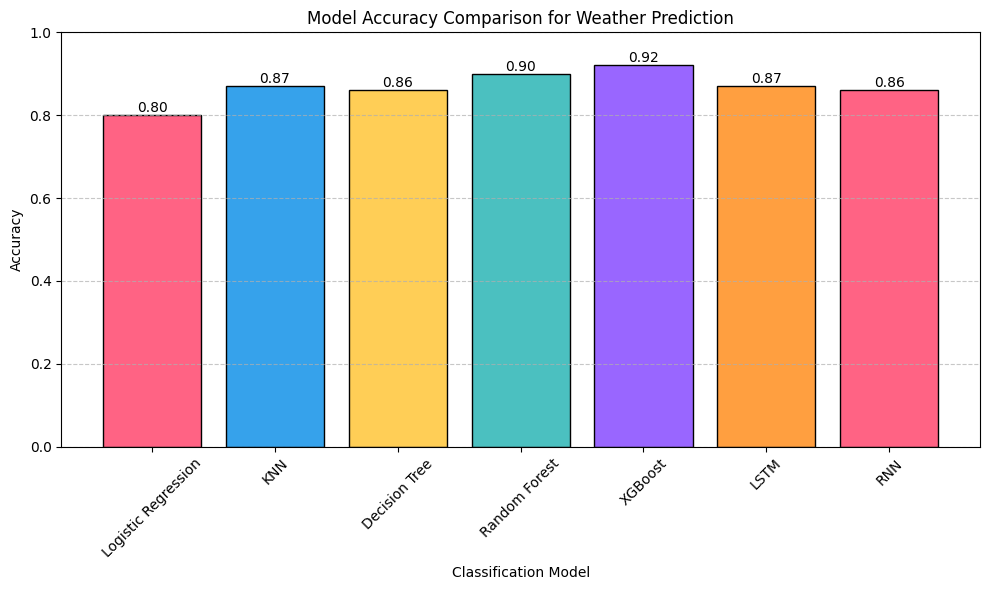

In [72]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight=class_weight_dict),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight=class_weight_dict),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', class_weight=class_weight_dict),
    'LSTM': Sequential([
        LSTM(64, input_shape=(1, X_train.shape[1]), activation='tanh'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'RNN': Sequential([
        SimpleRNN(64, input_shape=(1, X_train.shape[1]), activation='tanh'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Train models and store predictions/probabilities
model_objects = {}
models_pred = {}
model_probs = {}
for name, model in models.items():
    if name in ['LSTM', 'RNN']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=0, class_weight=class_weight_dict)
        y_pred_prob = model.predict(X_test_rnn, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)
    model_objects[name] = model
    models_pred[name] = y_pred
    model_probs[name] = y_pred_prob

# Initialize lists to store metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Calculate metrics for each model
for model_name, y_pred in models_pred.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model_probs[model_name])
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Create DataFrame for results
data = {
    "Classification Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC-AUC": roc_auc_scores
}
df_results = pd.DataFrame(data).round(2)

# Print model comparison table
print("\nModel Comparison:")
print(df_results.to_string(index=False, float_format="{:.2f}".format))

# Best model by Accuracy
best_index = np.argmax(accuracies)
best_model_name = model_names[best_index]
best_accuracy = accuracies[best_index]
print(f"\nBest Model (Accuracy): {best_model_name}")
print(f"Accuracy: {best_accuracy*100:.2f}%")

# Best model by Precision
best_precision_index = np.argmax(precisions)
best_precision_model = model_names[best_precision_index]
best_precision = precisions[best_precision_index]
print(f"\nBest Model (Precision): {best_precision_model}")
print(f"Precision: {best_precision*100:.2f}%")

# Best model by Recall
best_recall_index = np.argmax(recalls)
best_recall_model = model_names[best_recall_index]
best_recall = recalls[best_recall_index]
print(f"\nBest Model (Recall): {best_recall_model}")
print(f"Recall: {best_recall*100:.2f}%")

# Best model by F1-Score
best_f1_index = np.argmax(f1_scores)
best_f1_model_name = model_names[best_f1_index]
best_f1 = f1_scores[best_f1_index]
print(f"\nBest Model (F1-Score): {best_f1_model_name}")
print(f"F1-Score: {best_f1*100:.2f}%")

# Best model by ROC-AUC
best_roc_auc_index = np.argmax(roc_auc_scores)
best_roc_auc_model = model_names[best_roc_auc_index]
best_roc_auc = roc_auc_scores[best_roc_auc_index]
print(f"\nBest Model (ROC-AUC): {best_roc_auc_model}")
print(f"ROC-AUC: {best_roc_auc*100:.2f}%")

# Calculate ranks for each metric (higher value = better rank)
df_ranks = pd.DataFrame()
df_ranks['Classification Model'] = df_results['Classification Model']
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']:
    df_ranks[metric + '_Rank'] = df_results[metric].rank(ascending=False)

# Calculate the average rank for each model
df_ranks['Average_Rank'] = df_ranks[['Accuracy_Rank', 'Precision_Rank', 'Recall_Rank', 'F1 Score_Rank', 'ROC-AUC_Rank']].mean(axis=1)

# Find the model with the lowest average rank (lower is better since rank 1 is the best)
best_model_idx = df_ranks['Average_Rank'].idxmin()
best_model_name = df_ranks.loc[best_model_idx, 'Classification Model']
best_avg_rank = df_ranks.loc[best_model_idx, 'Average_Rank']

# Print the overall best model
print("\nOverall Best Model (based on average rank across all metrics):")
print(f"Model: {best_model_name}")
print(f"Average Rank: {best_avg_rank:.2f}")

# Print the full ranking table for reference
print("\nModel Rankings Across Metrics:")
print(df_ranks.to_string(index=False))

# Create bar graph for accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(df_results['Classification Model'], df_results['Accuracy'], 
               color=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40'], 
               edgecolor='black', linewidth=1)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Weather Prediction')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.tight_layout()

# Show the plot
plt.show()